# Homework # 4 Naive BAYES Classifier

### Instructor - Dr. Uma Gajendragadkar

### Problem - Design and develop Machine learning model to predict Diabetes using Naive Bayes Algorithm. 

### Dataset - Diabetes dataset

This dataset consists of 768 observations & 8 numerical independent variables.
Dependent and target variable is OUTCOME. 1 means diabetes test result being positive, 0 means indicates negative.

Pregnancies: Number of Times Being Pregnant

Glucose: Plasma Glucose Concentration (a 2 hours in an oral glucose tolerance test)

BloodPressure: Diastolic Blood Pressure (mm Hg)

SkinThickness: Triceps Skin Fold Thickness (mm)

Insulin: 2-Hour Serum Insulin (mu U/ml)

BMI: Body Mass Index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes Pedigree Function

Age: Age

Outcome: Class variable ( 0 - 1)



In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_validate
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot  as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB

<class 'ModuleNotFoundError'>: No module named 'seaborn'

Step 1 - Write code to Read data from dataset into pandas dataframe

In [2]:
# Load the dataset
df = pd.read_csv('diabetes.csv')

# Show the first few rows
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Step 2 - a) Write code to display dataset info 
b) Print 10 rows from dataset.

In [5]:
# Display first 10 rows of the dataset
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Step 3 - Write code to remove Pregnancy column 

In [6]:
# Drop the 'Pregnancies' column from the dataset
df.drop('Pregnancies', axis=1, inplace=True)

# Confirm it's gone
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1


Step 4 - Write code to display info of dataset and check shape of dataset.

In [7]:
# Show dataset info
df.info()

# Show dataset shape (rows, columns)
print("Shape of the dataset:", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB
Shape of the dataset: (768, 8)


Step 5 - Write code to clean data

In [8]:
import numpy as np

# Columns where 0 is biologically invalid
cols_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0s with NaN
df[cols_to_clean] = df[cols_to_clean].replace(0, np.nan)

# Impute missing values with median
df[cols_to_clean] = df[cols_to_clean].fillna(df[cols_to_clean].median())

# Confirm fix: check if any NaNs remain
print("Missing values after cleaning:")
print(df.isnull().sum())

Missing values after cleaning:
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Step 6 - Split data into training and testing sets ( 80: 20 ratio)

In [9]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Confirm the shape of splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (614, 7)
X_test shape: (154, 7)
y_train shape: (614,)
y_test shape: (154,)


#### **Step #7: Initialize your model**




In [10]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes classifier
nb_model = GaussianNB()

# Display model to confirm
print(nb_model)

GaussianNB()


#### **Step #8: Fit your model, test on the testing data, and create a visualization if applicable**

In [11]:
# Train the model using the training data
nb_model.fit(X_train, y_train)

# Predict on the test data
y_pred = nb_model.predict(X_test)

# Show a few predictions (optional)
print("Sample Predictions:", y_pred[:10])

Sample Predictions: [0 0 0 0 1 0 0 0 1 1]


Step 9 - Predict using model on test data

In [12]:
# Predict the labels for test data
y_pred = nb_model.predict(X_test)

# Display sample predictions
print("Predictions on test data:", y_pred[:10])

Predictions on test data: [0 0 0 0 1 0 0 0 1 1]


Step 10 -  Find accuracy of model

In [13]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display result
print("Model Accuracy: {:.2f}%".format(accuracy * 100))

Model Accuracy: 75.97%


Step 11 - Confusion Matrix

Matplotlib is building the font cache; this may take a moment.


Confusion Matrix:
 [[81 18]
 [19 36]]


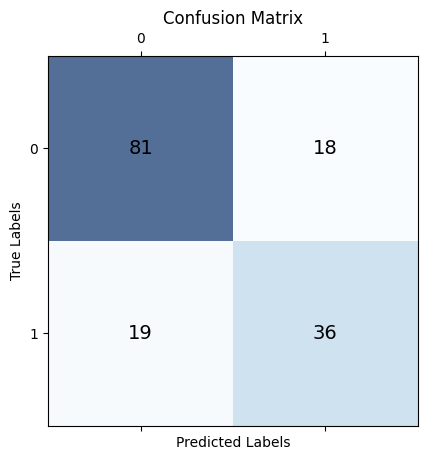

In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print it
print("Confusion Matrix:\n", cm)

# Plot it
fig, ax = plt.subplots()
ax.matshow(cm, cmap='Blues', alpha=0.7)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center', fontsize=14)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()